# CLUSTERING 

**Data Description**: The csv contains data on 12330 sesssions. The data include information about different kinds of pages and the amount of time spent on them( Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration), browsing behavior (BounceRates, ExitRates) and  sessions detailed information (PageValues, Special Date, v.v).

**Domain**: Marketing

**Context**: The information collected by customers' browsing behavior. 

**Attribute Information**

- The dataset consists of 10 numerical and 8 categorical attributes.
- The 'Revenue' attribute can be used as the class label.

- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 


- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 

- The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

- The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. 

- The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

- The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. 

- The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

**Learning Outcomes**
* Exploratory Data Analysis
* Preparing the data to train a model
* Training and making predictions using a clutering model
* Model evaluation

# Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import sklearn.metrics as metrics
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Read and Understand Data 

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.shape

(12330, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

#### Observation 1 - Dataset shape
Dataset has 5000 rows and 14 columns, with no missing values.

# Data Cleanse 

In [6]:
# Percentage of null values for each column
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64

#### Observation 2 - NaN Distribution between columns 
Found no NaN values in all columns 

# Exploratory Data Analysis

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


#### Observation 3 - Features Observations 
> - The duration time of ProductRelated_Duration is the highest one (mean of 1194.7 s), moving on with that of Informational (34.47 s) and Administrative (80.81 s). 

<AxesSubplot:>

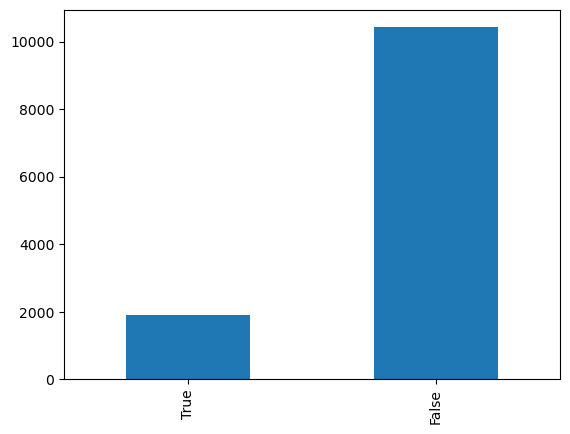

In [8]:
df.Revenue.value_counts().sort_values().plot(kind = 'bar')

Text(0.5, 1.0, 'Correlation Matrix of Data')

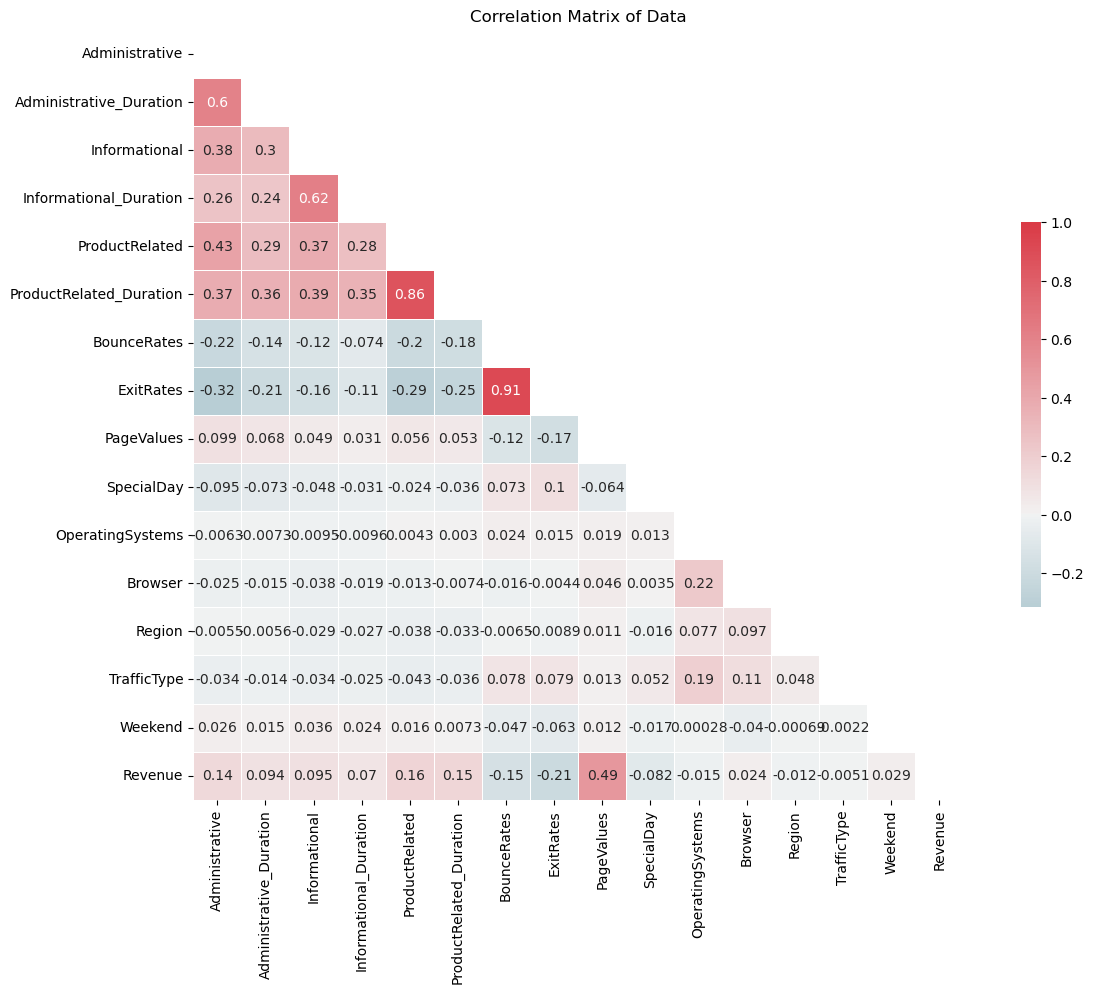

In [9]:
# Correlation matrix for all variables
corr = df.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (15, 10))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix of Data')

In [10]:
# Filter for correlation value greater than 0.5
sort = corr.abs().unstack()
sort = sort.sort_values(kind = "quicksort", ascending = False)
sort[(sort > 0.4) & (sort < 1)]

ExitRates                BounceRates                0.913004
BounceRates              ExitRates                  0.913004
ProductRelated_Duration  ProductRelated             0.860927
ProductRelated           ProductRelated_Duration    0.860927
Informational_Duration   Informational              0.618955
Informational            Informational_Duration     0.618955
Administrative_Duration  Administrative             0.601583
Administrative           Administrative_Duration    0.601583
Revenue                  PageValues                 0.492569
PageValues               Revenue                    0.492569
ProductRelated           Administrative             0.431119
Administrative           ProductRelated             0.431119
dtype: float64

#### Observation 4 - Correlation Matrix 

> - 1. As we can see that the first 6 features about the types of pages and duration time are highly relate to each other therefore keeping all of them in the traing set are not necessary. We will combine them and create 2 new columns call total_pages and total_duration which mean the total pagea browsed and time spent on each session. 
> - 2. Revenue are moderately relate with PageValues columns. 
> - 3. Even though the BoundRates and ExitRates are highly correlate to each other but we still want to keep all of them because it will help to describe the nuance in customers behavior. 


<AxesSubplot:xlabel='PageValues', ylabel='BounceRates'>

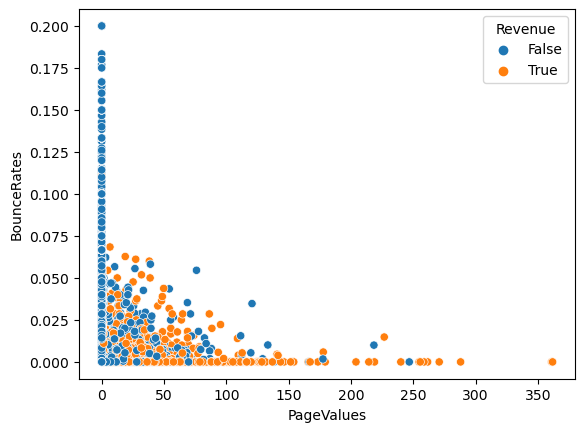

In [11]:
sns.scatterplot(data=df,x='PageValues', y ='BounceRates', hue= 'Revenue')

<AxesSubplot:xlabel='ProductRelated_Duration', ylabel='BounceRates'>

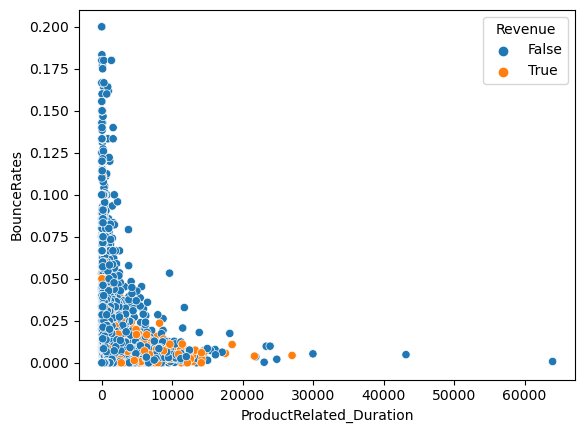

In [12]:
sns.scatterplot(data=df,x='ProductRelated_Duration', y ='BounceRates', hue= 'Revenue')

<AxesSubplot:xlabel='ProductRelated', ylabel='Count'>

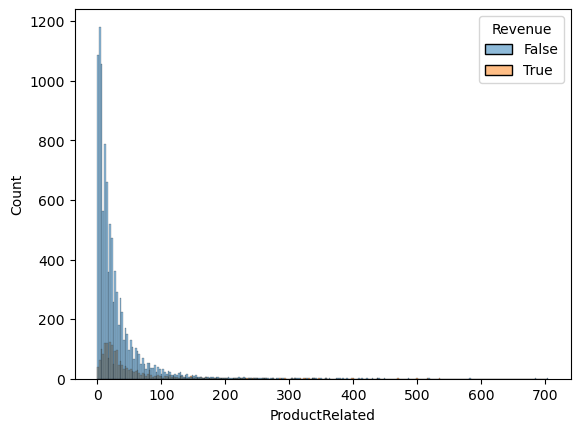

In [13]:
sns.histplot(data=df, x='ProductRelated', hue = 'Revenue')

<AxesSubplot:xlabel='BounceRates', ylabel='Count'>

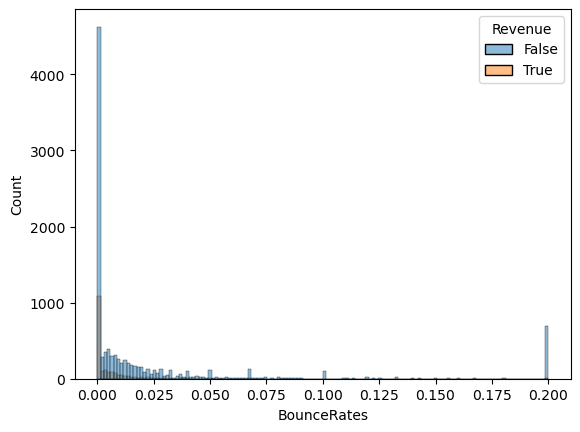

In [14]:
sns.histplot(data=df, x='BounceRates', hue = 'Revenue')

<AxesSubplot:xlabel='ProductRelated_Duration', ylabel='PageValues'>

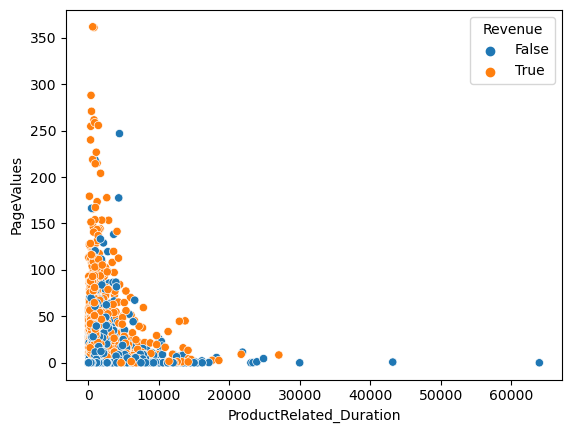

In [15]:
sns.scatterplot(data=df,x='ProductRelated_Duration', y ='PageValues', hue= 'Revenue')

# Hypothesis 

> * **Number of pages visited**: This feature measures the total number of pages a customer viewed during their session. Customers who view more pages may be more engaged or interested in the website's offerings.

> * **Time spent on website**: This feature measures the total amount of time a customer spent on the website during their session. Customers who spend more time on the website may be more engaged or interested in the website's offerings.

> * **Bounce rate**: This feature measures the percentage of customers who leave the website after viewing only one page. High bounce rates may indicate a problem with the website's design or content.

> * **Exit rate**: This feature measures the percentage of customers who leave the website from a specific page. High exit rates on certain pages may indicate a problem with the content or layout of those pages.

> * **Cluster 1: Engaged and Interested Customers**
    * This cluster would likely include customers who have **viewed a large number of pages** and **spent a lot of time on the website** during their session.
    * These customers would have **low bounce rates and exit rates**, indicating that they are engaged and interested in the website's offerings.
    * They may be more likely to make a purchase or return to the website in the future.
    * Marketers could target this group with personalized offers or promotions, or by creating more content that aligns with their interests.

> * **Cluster 2: Disengaged and Uninterested Customers**
    * This cluster would likely include customers who have viewed a small number of pages and spent a short amount of time on the website during their session.
    * These customers would have high bounce rates and exit rates, indicating that they are disengaged and uninterested in the website's offerings.
    * They may be less likely to make a purchase or return to the website in the future.
    * Marketers could target this group by improving the website's design and content or by offering more personalized recommendations.

> * **Cluster 3: Decision-making Customers**
    * This cluster would likely include customers who have viewed a moderate number of pages and spent a moderate amount of time on the website during their session.
    * These customers would have moderate bounce rates and exit rates, indicating that they are in the process of deciding whether to make a purchase or not.
    * They may be more likely to make a purchase if they receive personalized recommendations or offers.
    * Marketers could target this group by offering them a special offer or by providing more information about the products they are interested in.

> * **Cluster 4: Browsing Customers**
    * This cluster would likely include customers who have viewed a moderate number of pages and spent a moderate amount of time on the website during their session.
    * These customers would have moderate bounce rates and exit rates, indicating that they are browsing the website without a specific intention of buying.
    * They may be more likely to make a purchase if they receive personalized recommendations or offers.
    * Marketers could target this group by providing them more information about the products they are interested in or by showing them similar products.

# Feature Engineering

The authors create the following new features based on domain knowledge:
* `total_page`: Number of pages visited - This feature measures the total number of pages a customer viewed during their session
* `total_duration`: Time spent on website - This feature measures the total amount of time a customer spent on the website during their session

In [16]:
df['total_page'] = df['Administrative'] + df['Informational'] + df['ProductRelated']

In [17]:
df['total_duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']

In [18]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,total_page,total_duration
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,1,0.000000
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,2,64.000000
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,1,0.000000
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,2,2.666667
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,10,627.500000


In [19]:
df_prep = df[['total_page', 'total_duration', 'BounceRates', 'ExitRates']].copy()

In [20]:
df_prep

,total_page,total_duration,BounceRates,ExitRates
0,1,0.000000,0.200000,0.200000
1,2,64.000000,0.000000,0.100000
2,1,0.000000,0.200000,0.200000
3,2,2.666667,0.050000,0.140000
4,10,627.500000,0.020000,0.050000
...,...,...,...,...
12325,56,1928.791667,0.007143,0.029031
12326,5,465.750000,0.000000,0.021333
12327,6,184.250000,0.083333,0.086667
12328,19,421.000000,0.000000,0.021053


### Rescaling the Attributes

In [21]:
# Rescaling the attributes
# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(df_prep)
rfm_df_scaled.shape

(12330, 4)

In [22]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['TotalPages', 'TotalDuration', 'BounceRates', 'ExitRates']
rfm_df_scaled.head()

,TotalPages,TotalDuration,BounceRates,ExitRates
0,-0.721321,-0.642894,3.667189,3.229316
1,-0.699821,-0.611486,-0.457683,1.171473
2,-0.721321,-0.642894,3.667189,3.229316
3,-0.699821,-0.641585,0.573535,1.994610
4,-0.527823,-0.334952,-0.045196,0.142551


# Building the Model

## KMeans Clustering 

In [23]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [24]:
kmeans.labels_

array([1, 0, 1, ..., 0, 0, 0])

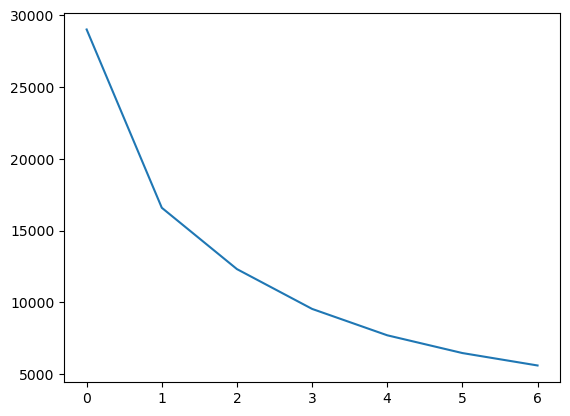

In [25]:

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)


In [26]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.6825402794369111
For n_clusters=3, the silhouette score is 0.6644584342029414
For n_clusters=4, the silhouette score is 0.5135272322242991
For n_clusters=5, the silhouette score is 0.4736334366435118
For n_clusters=6, the silhouette score is 0.44402880422762325
For n_clusters=7, the silhouette score is 0.42851261892989717
For n_clusters=8, the silhouette score is 0.40322986689658824


In [27]:
# Final model with k=5
kmeans = KMeans(n_clusters=5, max_iter=100)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=100, n_clusters=5)

In [28]:
 kmeans.labels_

array([1, 4, 1, ..., 4, 0, 4])

In [29]:
# assign the label
df_prep['Cluster_Id'] = kmeans.labels_
df_prep

,total_page,total_duration,BounceRates,ExitRates,Cluster_Id
0,1,0.000000,0.200000,0.200000,1
1,2,64.000000,0.000000,0.100000,4
2,1,0.000000,0.200000,0.200000,1
3,2,2.666667,0.050000,0.140000,4
4,10,627.500000,0.020000,0.050000,0
...,...,...,...,...,...
12325,56,1928.791667,0.007143,0.029031,0
12326,5,465.750000,0.000000,0.021333,0
12327,6,184.250000,0.083333,0.086667,4
12328,19,421.000000,0.000000,0.021053,0


<AxesSubplot:xlabel='Cluster_Id', ylabel='total_page'>

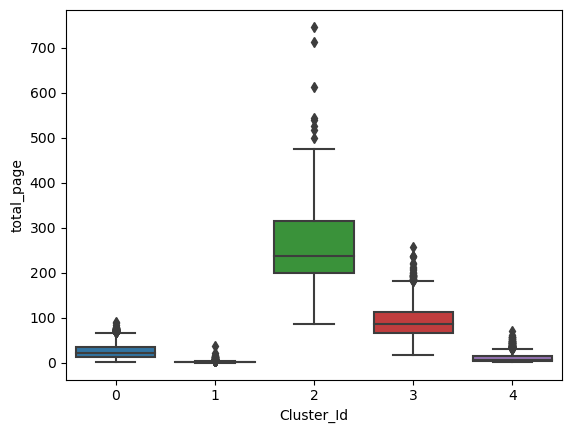

In [30]:
sns.boxplot(x='Cluster_Id', y='total_page', data=df_prep)

In [31]:
sns.boxplot(data= newdf, x='Cluster_Id', y='total_duration')

NameError: name 'newdf' is not defined

In [ ]:
sns.boxplot(data= newdf, x='Cluster_Id', y='BounceRates')

In [ ]:
sns.boxplot(x='Cluster_Id', y='ExitRates', data=df_prep)

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
predicted = DBSCAN(eps=0.1, min_samples=50).fit_predict(rfm_df_scaled)

In [ ]:
predicted

In [ ]:
# assign the label
df_prep['Cluster_Id_DBSCAN'] = predicted
df_prep.head()

In [ ]:
sns.boxplot(x='Cluster_Id_DBSCAN', y='total_page', data=df_prep)

In [ ]:
sns.boxplot(x='Cluster_Id_DBSCAN', y='total_duration', data=df_prep)

In [ ]:
sns.boxplot(x='Cluster_Id_DBSCAN', y='BounceRates', data=df_prep)

In [ ]:
sns.boxplot(x='Cluster_Id_DBSCAN', y='ExitRates', data=df_prep)

#### Plt 3D Scatter 

In [ ]:
import plotly.express as px

# Plotly 3D scatter chart is almost a one-liner, but use this function to keep the params in one place
def plotly_scatter_3d(df, x, y, z, color=None):
    fig = px.scatter_3d(df, x=x, y=y, z=z, color=color,
                    opacity=0.2, template='plotly_dark', color_continuous_scale=px.colors.qualitative.Set1)
    fig.show()   

In [ ]:
plotly_scatter_3d(rfm_df_scaled, 'TotalPages', 'TotalDuration', 'BounceRates')

# EDA for Clusters Regarding Revenue 

In [ ]:
df_revenue = df['Revenue'].copy()
df_revenue

In [ ]:
newdf = df_prep.join(df_revenue)
newdf

In [ ]:
sns.boxplot(data= newdf, x='Cluster_Id', y='total_page', hue='Revenue')

In [ ]:
sns.boxplot(data= newdf, x='Cluster_Id', y='total_duration', hue='Revenue')

In [ ]:
sns.boxplot(data= newdf, x='Cluster_Id', y='BounceRates', hue='Revenue')

In [ ]:
sns.boxplot(data= newdf, x='Cluster_Id', y='ExitRates', hue='Revenue')

# Conclustion

In conclusion, the predictive results confirm our hypothesises with:

> - Cluster 0 represent the Decision Making Customers with higher total_page and total_duration than Cluster 1 and 4 while lower than cluster 1 and 4 in BounceRate and ExitRates.

> - Cluster 1 and 4 represent the Browsing Customers with moderate total_page, total_duration, moderate BounceRate and ExitRates.

> - Cluster 2 represent the Engaged and Interested Customers with highest total pages and time spent browsing and lowest BounceRates and ExitRates.

> - Cluster 3 reprsent the Disengaged and Uninterested Customers with highest BounceRates and ExitRates and lowest total_page and total_duration. 